In [1]:
import pandas
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import Graphing

In [2]:
# Global Variables
scaler = MinMaxScaler(feature_range=(0, 1))
# we look back the past 60 days to predict the next 5 days
look_back = 60

In [3]:
# 1. Data Preprocessing
df1 = pandas.read_excel("LSTM Input data.xlsx")
df1 = df1.iloc[::-1]
df = df1.drop("Date", axis=1)
df

,BCM,CEB,BOC,CNCB
2393,2.720413,2.017268,1.796521,2.199660
2392,2.715328,2.006843,1.796521,2.178408
2391,2.766177,1.980780,1.837585,2.215600
2390,2.781431,1.970355,1.837585,2.226227
2389,2.745838,1.965142,1.822186,2.199660
...,...,...,...,...
4,4.490000,2.260000,2.660000,3.490000
3,4.660000,2.320000,2.730000,3.630000
2,4.540000,2.310000,2.680000,3.580000
1,4.560000,2.290000,2.710000,3.590000


In [4]:
# we want number of data to be a multiple of 5
df = df[(len(df) % 5):]
scaled_data = scaler.fit_transform(df)

scaled_data

array([[0.15228392, 0.3327745 , 0.16550618, 0.11944495],
       [0.16482479, 0.35765475, 0.17199645, 0.13552421],
       [0.1540752 , 0.34832476, 0.16550618, 0.12174217],
       ...,
       [0.78442748, 0.53853092, 0.70784682, 0.71619934],
       [0.79147415, 0.5265981 , 0.72681388, 0.72052258],
       [0.7879509 , 0.50869887, 0.71416917, 0.70755287]])

In [5]:
x, y = [], []
for i in range(look_back, len(scaled_data), 5):
    x.append(scaled_data[i-look_back:i])
    y.append(scaled_data[i:i+5])
x, y = np.array(x), np.array(y)

In [6]:
# we only test on the last 50 days of data
train_idx = x.shape[0] - 10
x_train = x[:train_idx]
x_test = x[train_idx:]
y_train = y[:train_idx]
y_test = y[train_idx:]
y_test[-1]

array([[0.76681074, 0.50869887, 0.69520212, 0.67729019],
       [0.82670747, 0.54449734, 0.73945858, 0.73781564],
       [0.78442748, 0.53853092, 0.70784682, 0.71619934],
       [0.79147415, 0.5265981 , 0.72681388, 0.72052258],
       [0.7879509 , 0.50869887, 0.71416917, 0.70755287]])

In [7]:
y_train = y_train.reshape(y_train.shape[0], -1)
y_train.shape

(456, 20)

In [8]:
# 2. Build LSTM Model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 4)))
model.add(LSTM(units=50))
model.add(Dense(units=20))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# 3. Train and Predict
model.fit(x_train, y_train, epochs=40, batch_size=32)

Epoch 1/40
15/15 [==============================] - 2s 20ms/step - loss: 0.1705
Epoch 2/40
15/15 [==============================] - 0s 19ms/step - loss: 0.0242
Epoch 3/40
15/15 [==============================] - 0s 20ms/step - loss: 0.0118
Epoch 4/40
15/15 [==============================] - 0s 19ms/step - loss: 0.0088
Epoch 5/40
15/15 [==============================] - 0s 20ms/step - loss: 0.0078
Epoch 6/40
15/15 [==============================] - 0s 21ms/step - loss: 0.0071
Epoch 7/40
15/15 [==============================] - 0s 20ms/step - loss: 0.0066
Epoch 8/40
15/15 [==============================] - 0s 20ms/step - loss: 0.0064
Epoch 9/40
15/15 [==============================] - 0s 19ms/step - loss: 0.0059
Epoch 10/40
15/15 [==============================] - 0s 19ms/step - loss: 0.0054
Epoch 11/40
15/15 [==============================] - 0s 20ms/step - loss: 0.0050
Epoch 12/40
15/15 [==============================] - 0s 20ms/step - loss: 0.0046
Epoch 13/40
15/15 [==================

In [10]:
test_predictions = model.predict(x_test)
test_predictions = test_predictions.reshape(-1, 4)
test_predictions = scaler.inverse_transform(test_predictions)

test_predictions

1/1 [==============================] - 0s 476ms/step


array([[4.59935  , 2.2056787, 2.8659213, 3.754582 ],
       [4.6862144, 2.20123  , 2.8477237, 3.759422 ],
       [4.713566 , 2.2037587, 2.875563 , 3.7451472],
       [4.698635 , 2.2133002, 2.8624387, 3.722535 ],
       [4.5986   , 2.2119668, 2.8674042, 3.7222817],
       [4.623282 , 2.2161684, 2.8688486, 3.7294388],
       [4.701267 , 2.2076037, 2.8567793, 3.7323365],
       [4.7238116, 2.206379 , 2.8896766, 3.7269313],
       [4.7091646, 2.2140892, 2.876548 , 3.7084265],
       [4.619745 , 2.2209578, 2.8774014, 3.7009192],
       [4.4933295, 2.1622643, 2.810615 , 3.6485176],
       [4.5832343, 2.1720977, 2.7977886, 3.6453204],
       [4.612709 , 2.169151 , 2.82263  , 3.6184874],
       [4.5811453, 2.1801236, 2.8119853, 3.59801  ],
       [4.4847627, 2.1736844, 2.80644  , 3.6035087],
       [4.4264793, 2.151473 , 2.7657843, 3.5951548],
       [4.508292 , 2.1586523, 2.765878 , 3.580899 ],
       [4.5308914, 2.1606474, 2.7857049, 3.5626109],
       [4.5105486, 2.17094  , 2.7795703, 3.551

In [11]:
test_answer = scaler.inverse_transform(y_test.reshape(-1, 4))
test_answer

array([[4.82927561, 2.24000001, 2.90322256, 3.68000007],
       [4.7647624 , 2.23000002, 2.87566042, 3.67000008],
       [4.78319502, 2.25      , 2.88484764, 3.68000007],
       [4.79241085, 2.26999998, 2.9307847 , 3.69000006],
       [4.71999979, 2.25999999, 2.90322256, 3.68000007],
       [4.55000019, 2.24000001, 2.8480978 , 3.6400001 ],
       [4.46000004, 2.20000005, 2.77999997, 3.57999992],
       [4.44999981, 2.18000007, 2.75999999, 3.55999994],
       [4.42999983, 2.18000007, 2.75      , 3.55999994],
       [4.40999985, 2.18000007, 2.74000001, 3.56999993],
       [4.46000004, 2.18000007, 2.74000001, 3.56999993],
       [4.48999977, 2.20000005, 2.75999999, 3.61999989],
       [4.53999996, 2.22000003, 2.79999995, 3.67000008],
       [4.48999977, 2.19000006, 2.75999999, 3.58999991],
       [4.46000004, 2.20000005, 2.74000001, 3.61999989],
       [4.48999977, 2.21000004, 2.75      , 3.61999989],
       [4.53999996, 2.23000002, 2.77999997, 3.6500001 ],
       [4.44999981, 2.20000005,

In [21]:
#MSE
diff = test_answer - test_predictions
diff = np.absolute(diff)
mse = np.sum(diff) / diff.shape[0] / diff.shape[1]
print(f"Mean square error: {mse}")

Mean square error: 0.08421306490898134


In [12]:
df2 = df1.set_index('Date', drop=True)

In [13]:
def graphResult(data:np.ndarray, df2:pandas.DataFrame, identifier:str = "Prediction vs actual"):
    for ct, i in enumerate(df2.columns.values):
        dff = pandas.DataFrame(df2[i])
        dff['Predicted'] = data[:,ct].reshape(-1)
        fig = Graphing.lineGraphWithMultipleLines(dff, f"{identifier} - {i}", "Time", "Price")
        Graphing.mySaveFig(fig, f"{identifier} - {i}")

TypeError: Cannot perform 'xor' with a dtyped [float64] array and scalar of type [bool]

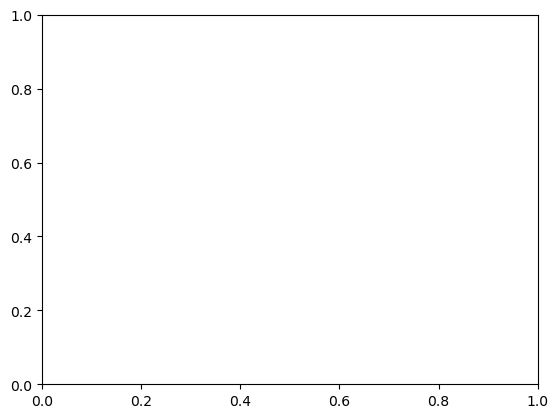

In [14]:
graphResult(test_predictions, df2[-len(test_answer):], "Last 10 periods prediction with correct input")

In [ ]:
def predictMultiplePeriods(data:np.ndarray, numOfPrds:int):
    output = []
    for i in range(numOfPrds):
        result = model.predict(data.reshape(1, data.shape[0], -1))
        output.append(result)
        result = result.reshape(-1,4)
        # print(f"data shape 1: {data.shape}")
        # print(data)
        data = data[5:]
        # print(f"data shape 2: {data.shape}")
        # print(data)
        data = np.append(data, result)
        # print(f"data shape 3: {data.shape}")
        # print(data)
        data = data.reshape(-1, 4)
        print(f"pass {i + 1} complete")
    output = np.array(output)
    return output.reshape(-1, 4)

In [ ]:
test_predictions = predictMultiplePeriods(x_test[-4], 3)
test_predictions = scaler.inverse_transform(test_predictions)
test_predictions

In [ ]:
graphResult(test_predictions, df2[-15:], "Last 15 days prediction, pure prediction without real input")
